<a href="https://colab.research.google.com/github/Fitomarcelindo/Analisa-Algortima-With-Python/blob/main/hepatitis_datasceintis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
UAS = pd.read_csv('hepatitis.csv')
UAS

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [3]:
UAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       154 non-null    int64 
 1   30      154 non-null    int64 
 2   2.1     154 non-null    int64 
 3   1       154 non-null    object
 4   2.2     154 non-null    int64 
 5   2.3     154 non-null    object
 6   2.4     154 non-null    object
 7   2.5     154 non-null    object
 8   1.1     154 non-null    object
 9   2.6     154 non-null    object
 10  2.7     154 non-null    object
 11  2.8     154 non-null    object
 12  2.9     154 non-null    object
 13  2.10    154 non-null    object
 14  1.00    154 non-null    object
 15  85      154 non-null    object
 16  18      154 non-null    object
 17  4.0     154 non-null    object
 18  ?       154 non-null    object
 19  1.2     154 non-null    int64 
dtypes: int64(5), object(15)
memory usage: 24.2+ KB


In [8]:
UAS['CLASS'].value_counts()

1    84
2    70
Name: CLASS, dtype: int64

In [23]:
UAS.describe()

,SEX,AGE,STEROID,FATIGUE,PROTIME,CLASS
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.792208,41.272727,1.097403,1.844156,15.818182,0.454545
std,0.407051,12.574106,0.297473,0.363891,7.112958,0.499554
min,0.000000,7.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,32.000000,1.000000,2.000000,11.000000,0.000000
50%,1.000000,39.000000,1.000000,2.000000,16.000000,0.000000
75%,1.000000,50.000000,1.000000,2.000000,19.000000,1.000000
max,1.000000,78.000000,2.000000,2.000000,29.000000,1.000000


In [24]:
UAS.columns=["CLASS","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER_BIG","LIVER_FIRM","SPLEEN_PALPABLE",
                 "SPIDERS","ASCITIES","VARCIES","BILIRUBI","ALK PHOSPHATE","SHOT","ALBUMIN","PROTIME","HISTOLOGI"]

In [25]:
UAS.describe()

,CLASS,AGE,SEX,ANTIVIRALS,ALBUMIN,HISTOLOGI
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.792208,41.272727,1.097403,1.844156,15.818182,0.454545
std,0.407051,12.574106,0.297473,0.363891,7.112958,0.499554
min,0.000000,7.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,32.000000,1.000000,2.000000,11.000000,0.000000
50%,1.000000,39.000000,1.000000,2.000000,16.000000,0.000000
75%,1.000000,50.000000,1.000000,2.000000,19.000000,1.000000
max,1.000000,78.000000,2.000000,2.000000,29.000000,1.000000


In [26]:
UAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLASS            154 non-null    int64 
 1   AGE              154 non-null    int64 
 2   SEX              154 non-null    int64 
 3   STEROID          154 non-null    object
 4   ANTIVIRALS       154 non-null    int64 
 5   FATIGUE          154 non-null    object
 6   MALAISE          154 non-null    object
 7   ANOREXIA         154 non-null    object
 8   LIVER_BIG        154 non-null    object
 9   LIVER_FIRM       154 non-null    object
 10  SPLEEN_PALPABLE  154 non-null    object
 11  SPIDERS          154 non-null    object
 12  ASCITIES         154 non-null    object
 13  VARCIES          154 non-null    object
 14  BILIRUBI         154 non-null    object
 15  ALK PHOSPHATE    154 non-null    object
 16  SHOT             154 non-null    object
 17  ALBUMIN          154 non-null    in

In [28]:
UAS['CLASS'].value_counts()

1    122
0     32
Name: CLASS, dtype: int64

In [29]:
categorical_col = []
for column in UAS.columns:
    if UAS[column].dtype == object and len(UAS[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {UAS[column].unique()}")
        print("====================================")


STEROID : ['1' '2' '?']
FATIGUE : ['1' '2' '?']
MALAISE : ['2' '1' '?']
ANOREXIA : ['2' '1' '?']
LIVER_BIG : ['1' '2' '?']
LIVER_FIRM : ['2' '1' '?']
SPLEEN_PALPABLE : ['2' '1' '?']
SPIDERS : ['2' '1' '?']
ASCITIES : ['2' '1' '?']
VARCIES : ['2' '?' '1']
BILIRUBI : ['0.90' '0.70' '1.00' '?' '1.30' '2.20' '2.00' '1.20' '0.60' '0.40' '0.80'
 '1.40' '2.30' '0.50' '0.30' '4.60' '1.80' '3.50' '4.10' '1.60' '2.80'
 '1.50' '2.50' '3.00' '4.80' '2.40' '1.70' '1.10' '3.20' '2.90' '8.00'
 '3.90' '1.90' '4.20' '7.60']
PROTIME : ['?' '80' '75' '85' '54' '52' '78' '46' '63' '62' '64' '39' '100' '47'
 '70' '36' '40' '74' '60' '73' '90' '21' '77' '29' '41' '66' '57' '56'
 '76' '58' '84' '38' '67' '31' '51' '23' '72' '32' '30' '0' '50' '43' '35'
 '48' '42']


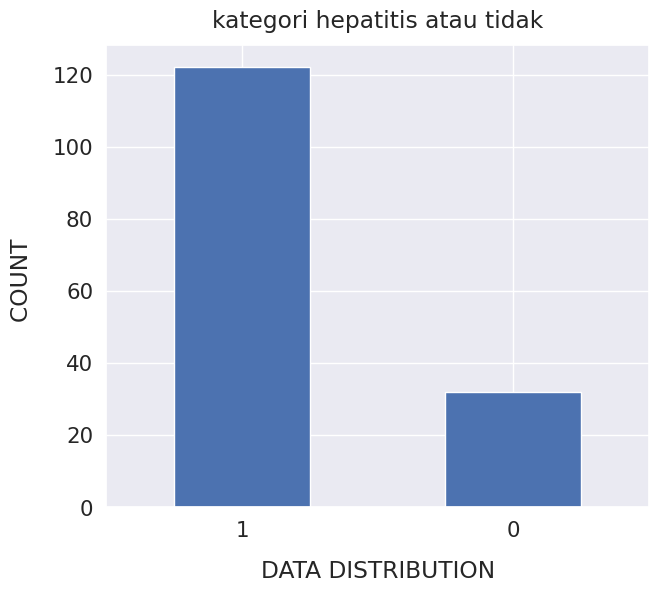

In [30]:
sns.set(font_scale=1.4)
UAS['CLASS'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("DATA DISTRIBUTION", labelpad=14)
plt.ylabel("COUNT ", labelpad=14)
plt.title("kategori hepatitis atau tidak", y=1.02);

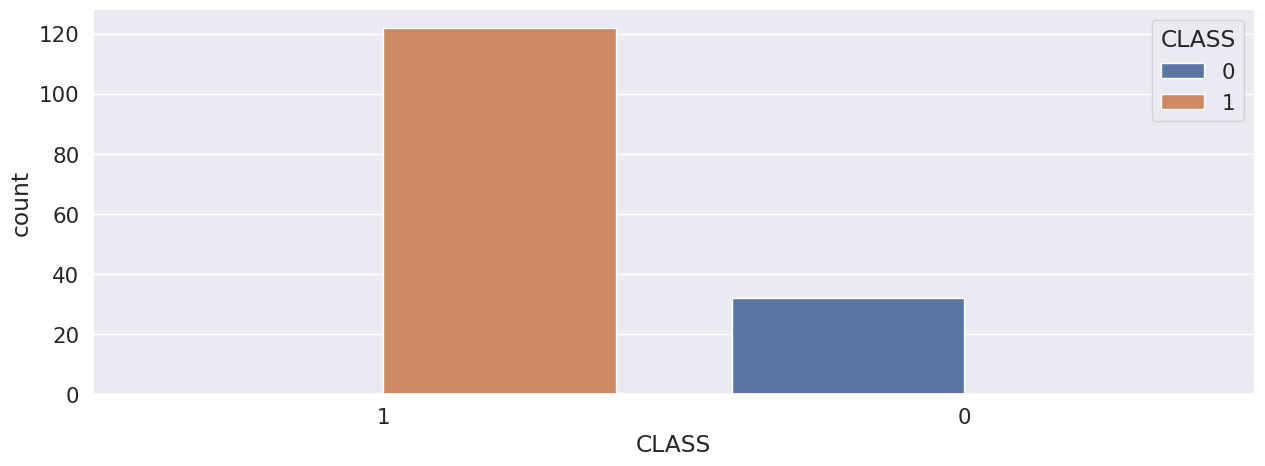

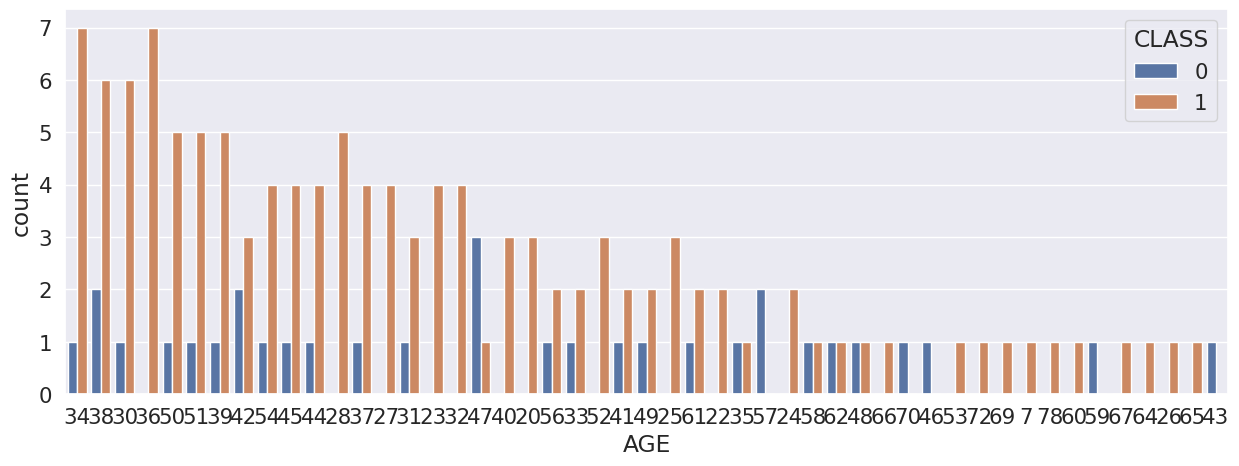

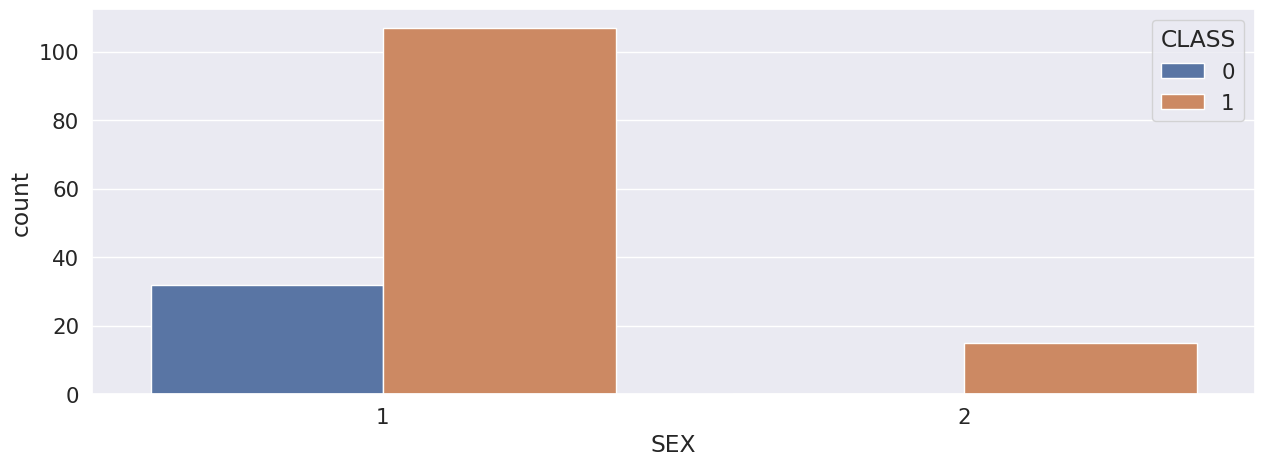

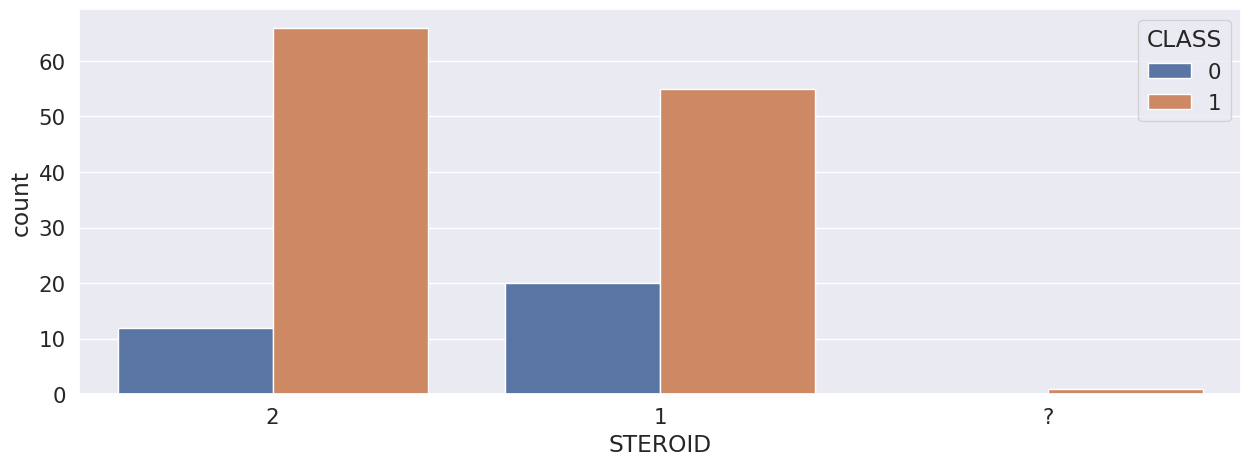

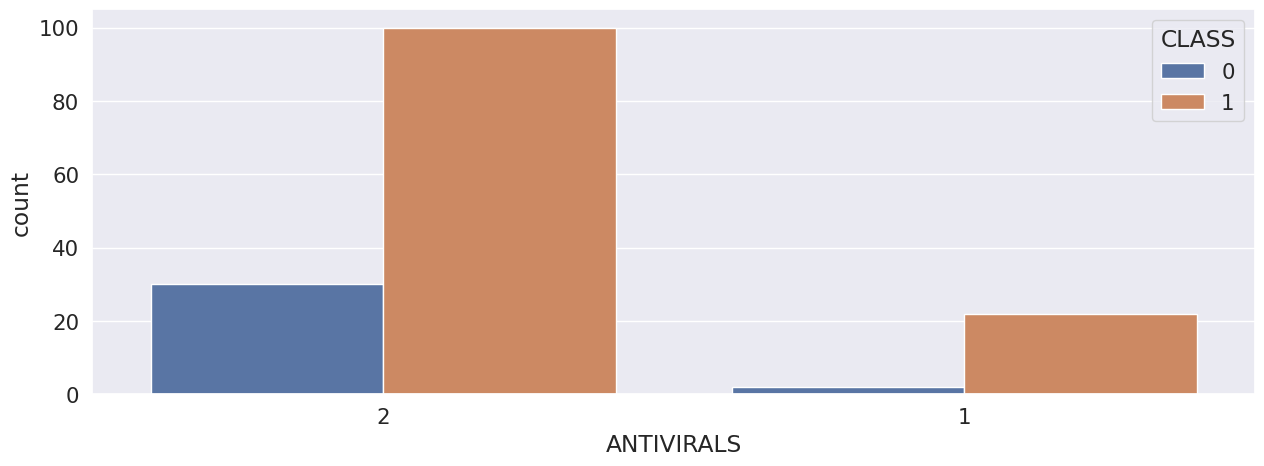

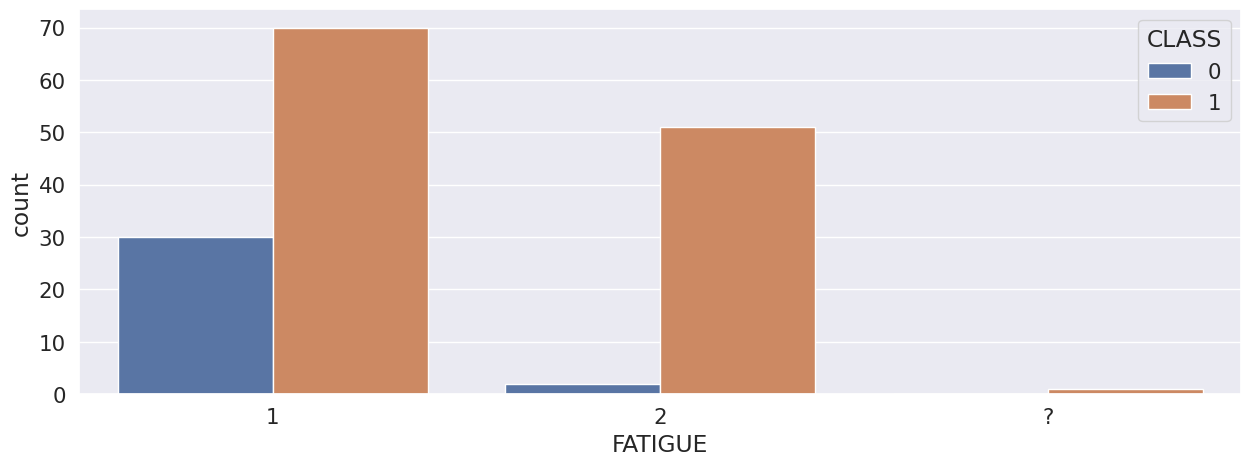

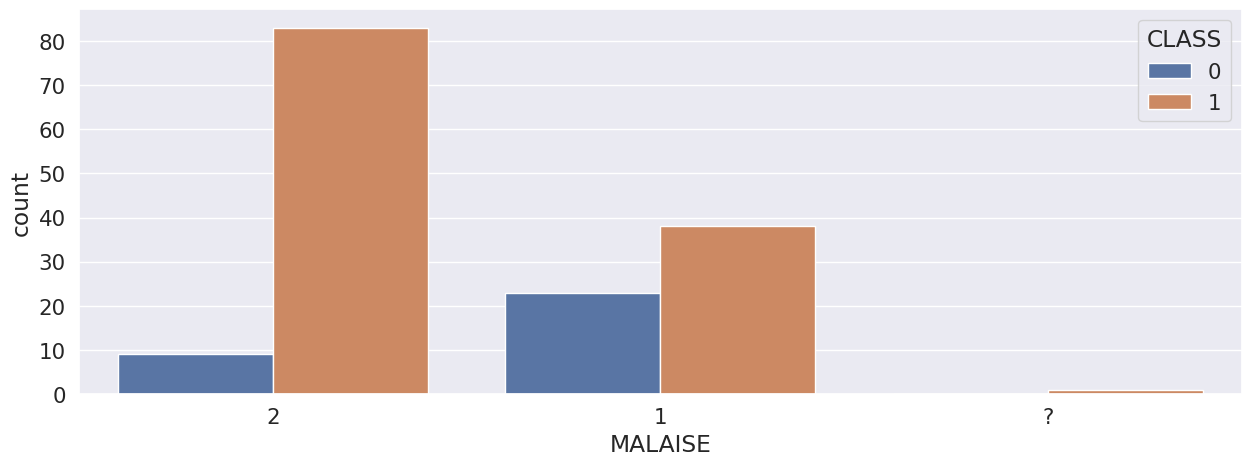

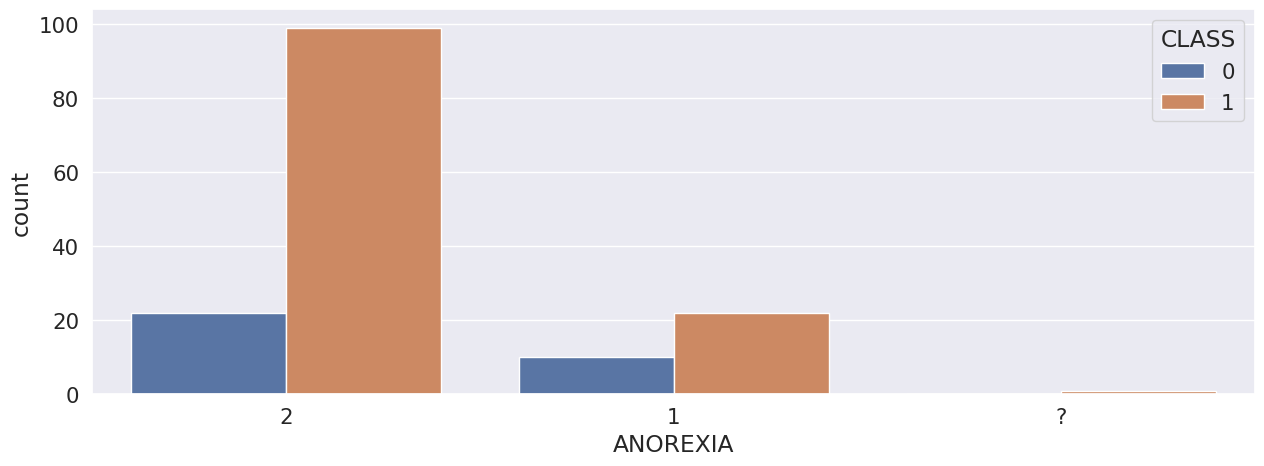

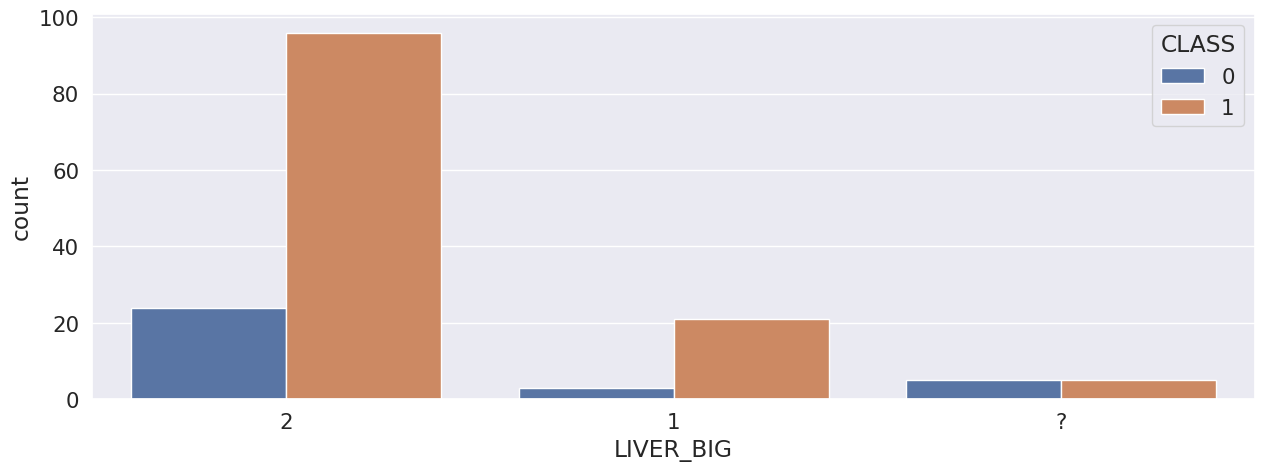

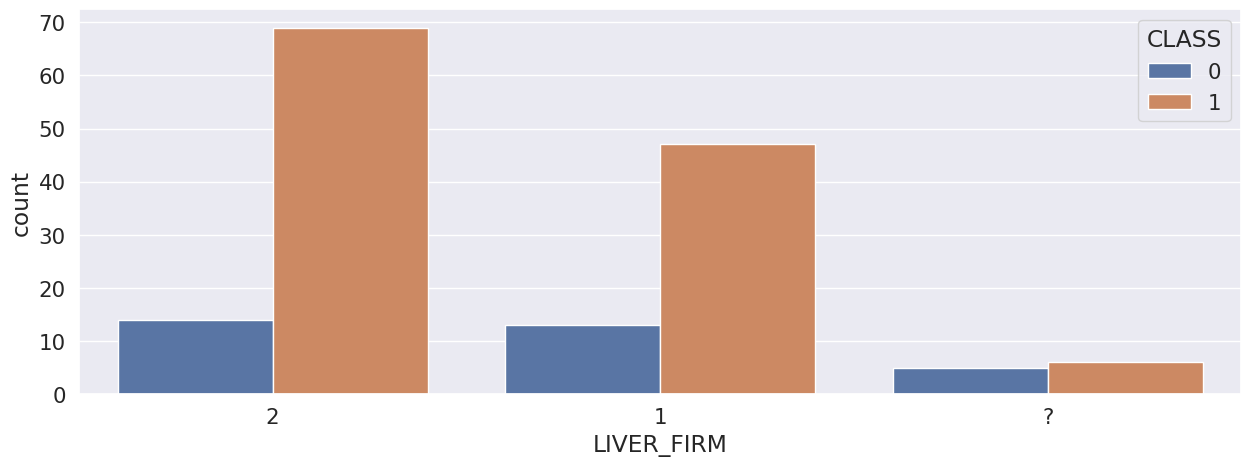

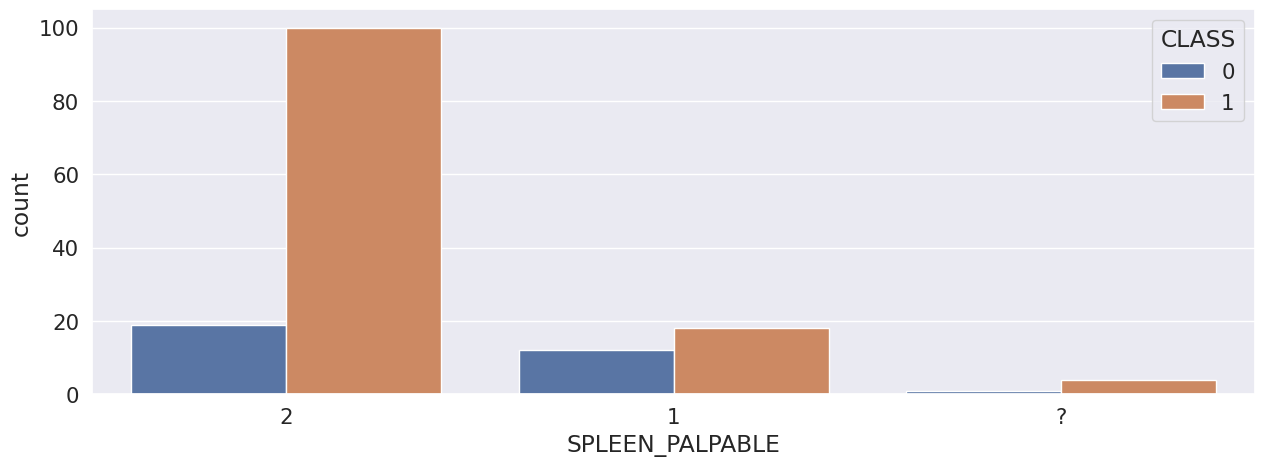

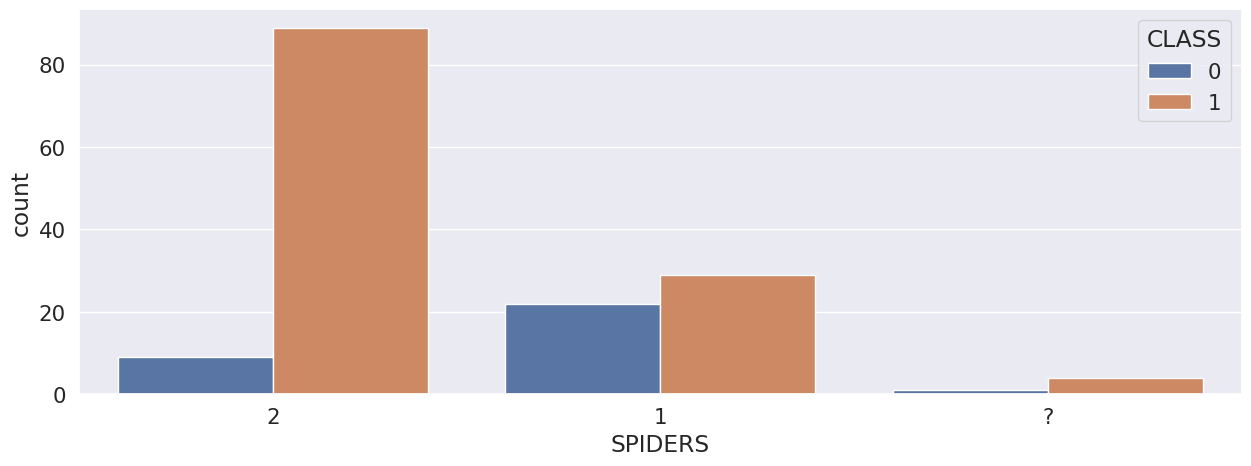

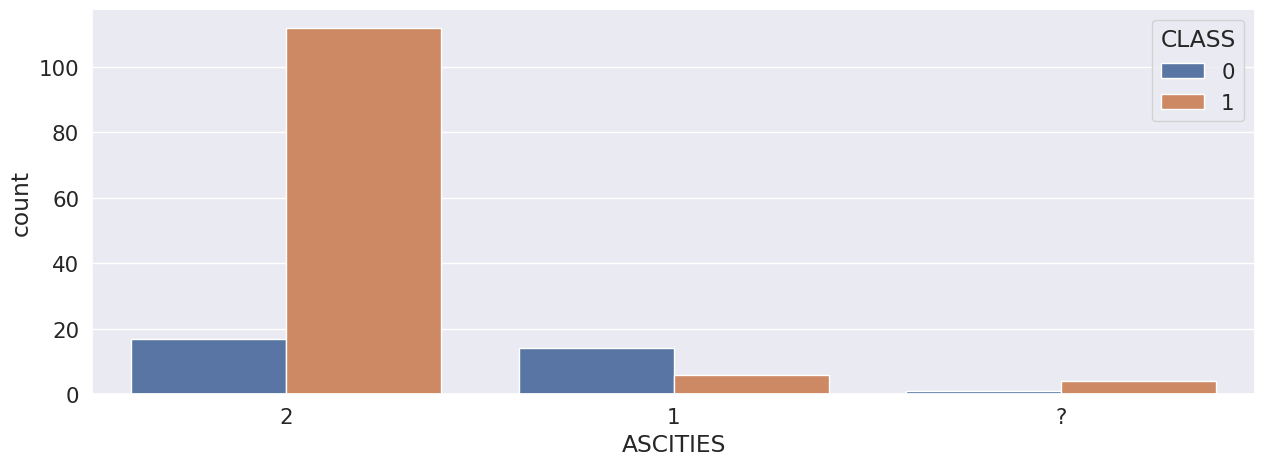

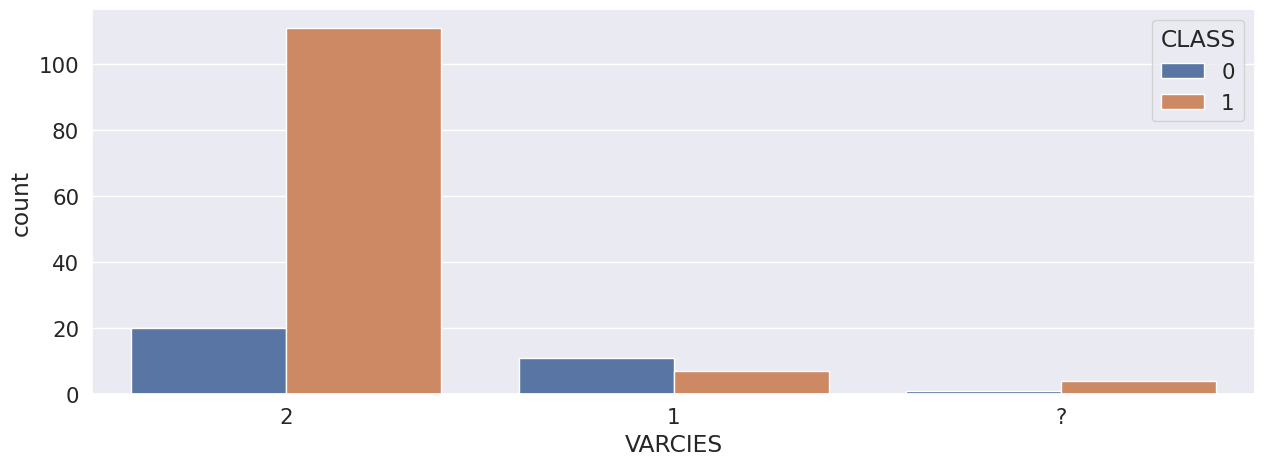

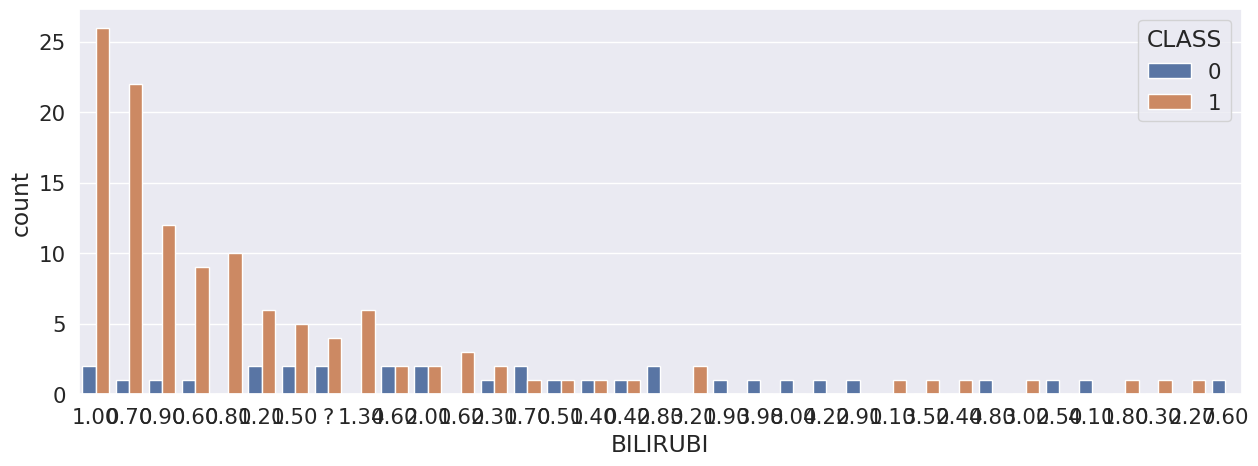

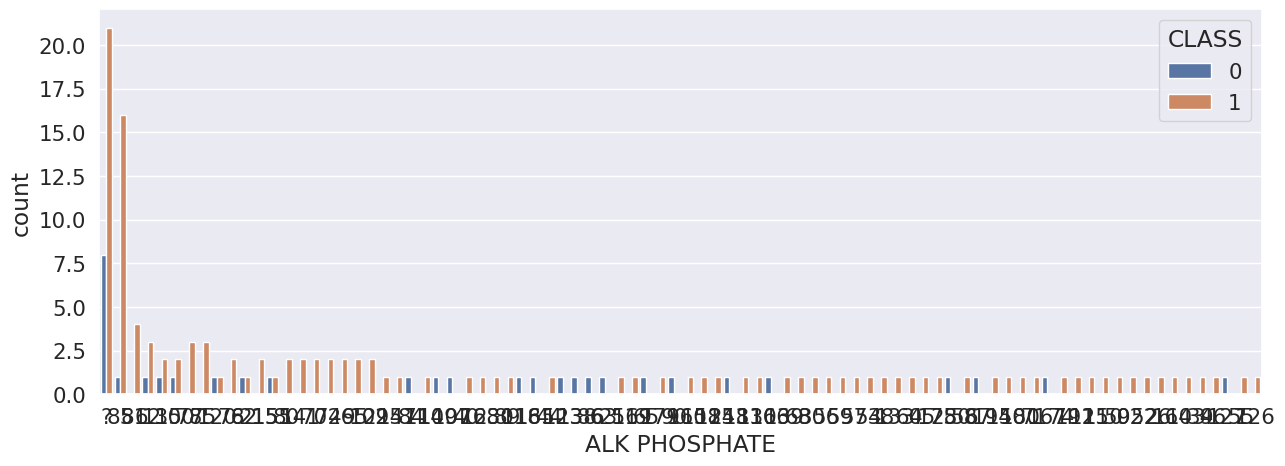

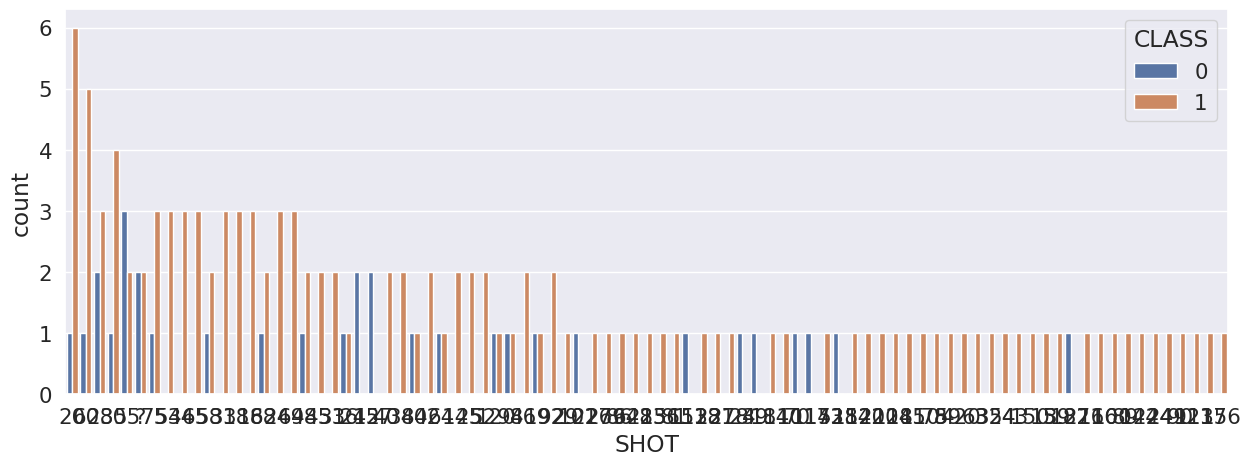

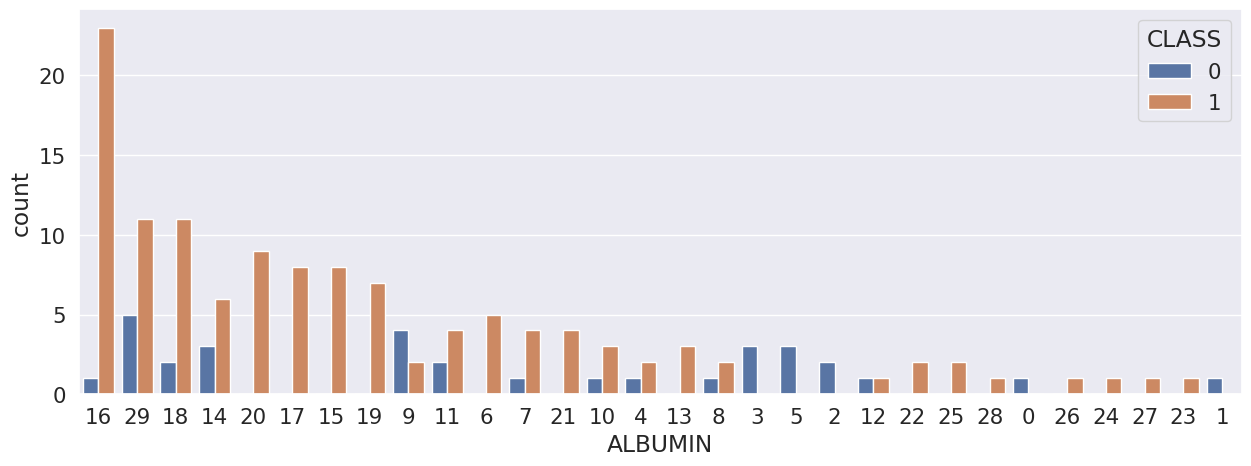

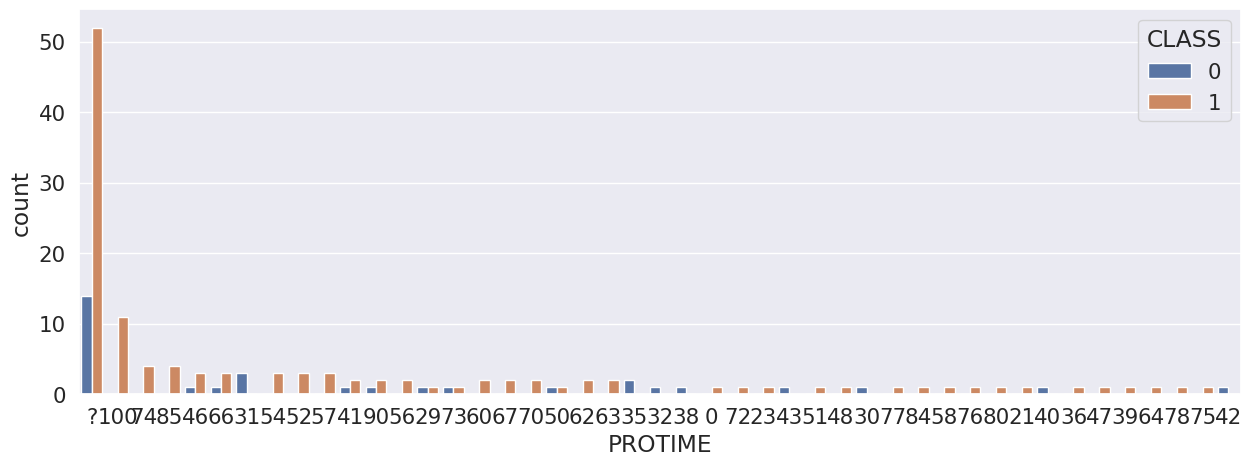

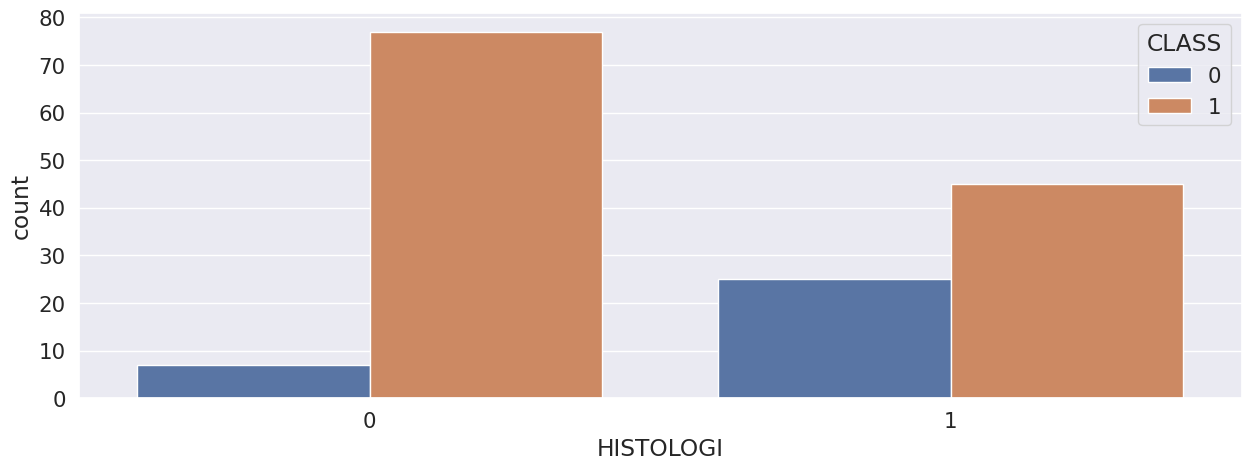

In [31]:
categorical_col = []
for column in UAS.columns:
    plt.subplots(figsize = (15,5))
    sns.countplot(x=UAS[column],order=UAS[column].value_counts().index,hue=UAS['CLASS'])
    plt.show()

<ipython-input-33-c96092aac80b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = UAS.corr()


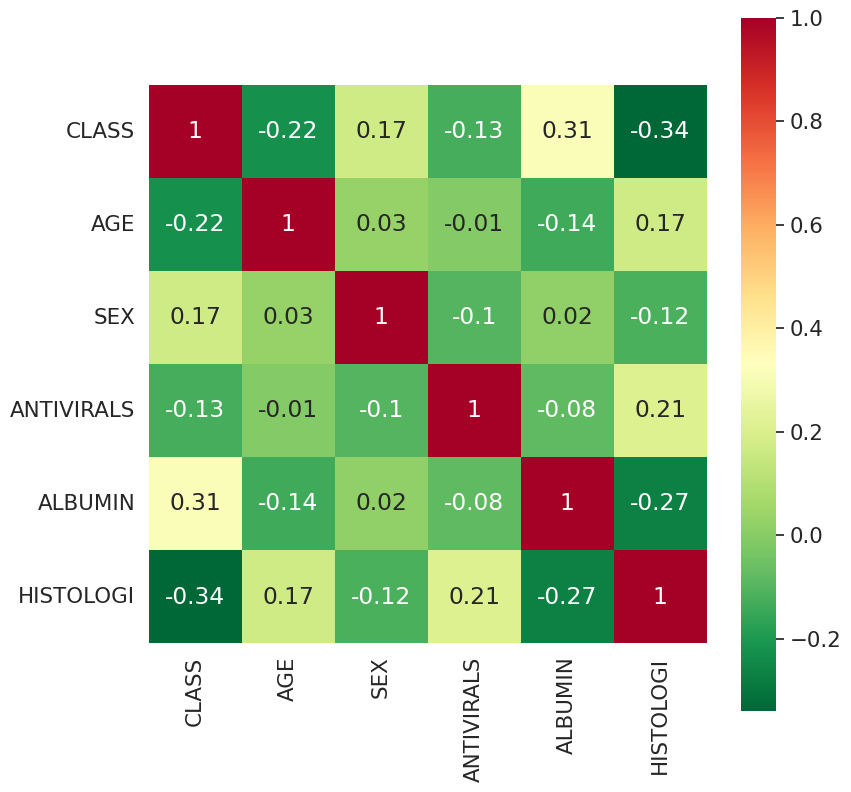

In [33]:
# Correlation Heatmap
correlation = UAS.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [34]:
UAS.replace("?", np.nan, inplace= True)

In [36]:
categorical_col = []
for column in UAS.columns:
    if UAS[column].dtype == object and len(UAS[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {UAS[column].unique()}")
        print("====================================")


STEROID : ['1' '2' nan]
FATIGUE : ['1' '2' nan]
MALAISE : ['2' '1' nan]
ANOREXIA : ['2' '1' nan]
LIVER_BIG : ['1' '2' nan]
LIVER_FIRM : ['2' '1' nan]
SPLEEN_PALPABLE : ['2' '1' nan]
SPIDERS : ['2' '1' nan]
ASCITIES : ['2' '1' nan]
VARCIES : ['2' nan '1']
BILIRUBI : ['0.90' '0.70' '1.00' nan '1.30' '2.20' '2.00' '1.20' '0.60' '0.40' '0.80'
 '1.40' '2.30' '0.50' '0.30' '4.60' '1.80' '3.50' '4.10' '1.60' '2.80'
 '1.50' '2.50' '3.00' '4.80' '2.40' '1.70' '1.10' '3.20' '2.90' '8.00'
 '3.90' '1.90' '4.20' '7.60']
PROTIME : [nan '80' '75' '85' '54' '52' '78' '46' '63' '62' '64' '39' '100' '47'
 '70' '36' '40' '74' '60' '73' '90' '21' '77' '29' '41' '66' '57' '56'
 '76' '58' '84' '38' '67' '31' '51' '23' '72' '32' '30' '0' '50' '43' '35'
 '48' '42']


In [37]:
UAS.isnull().values.any()

True

<Axes: >

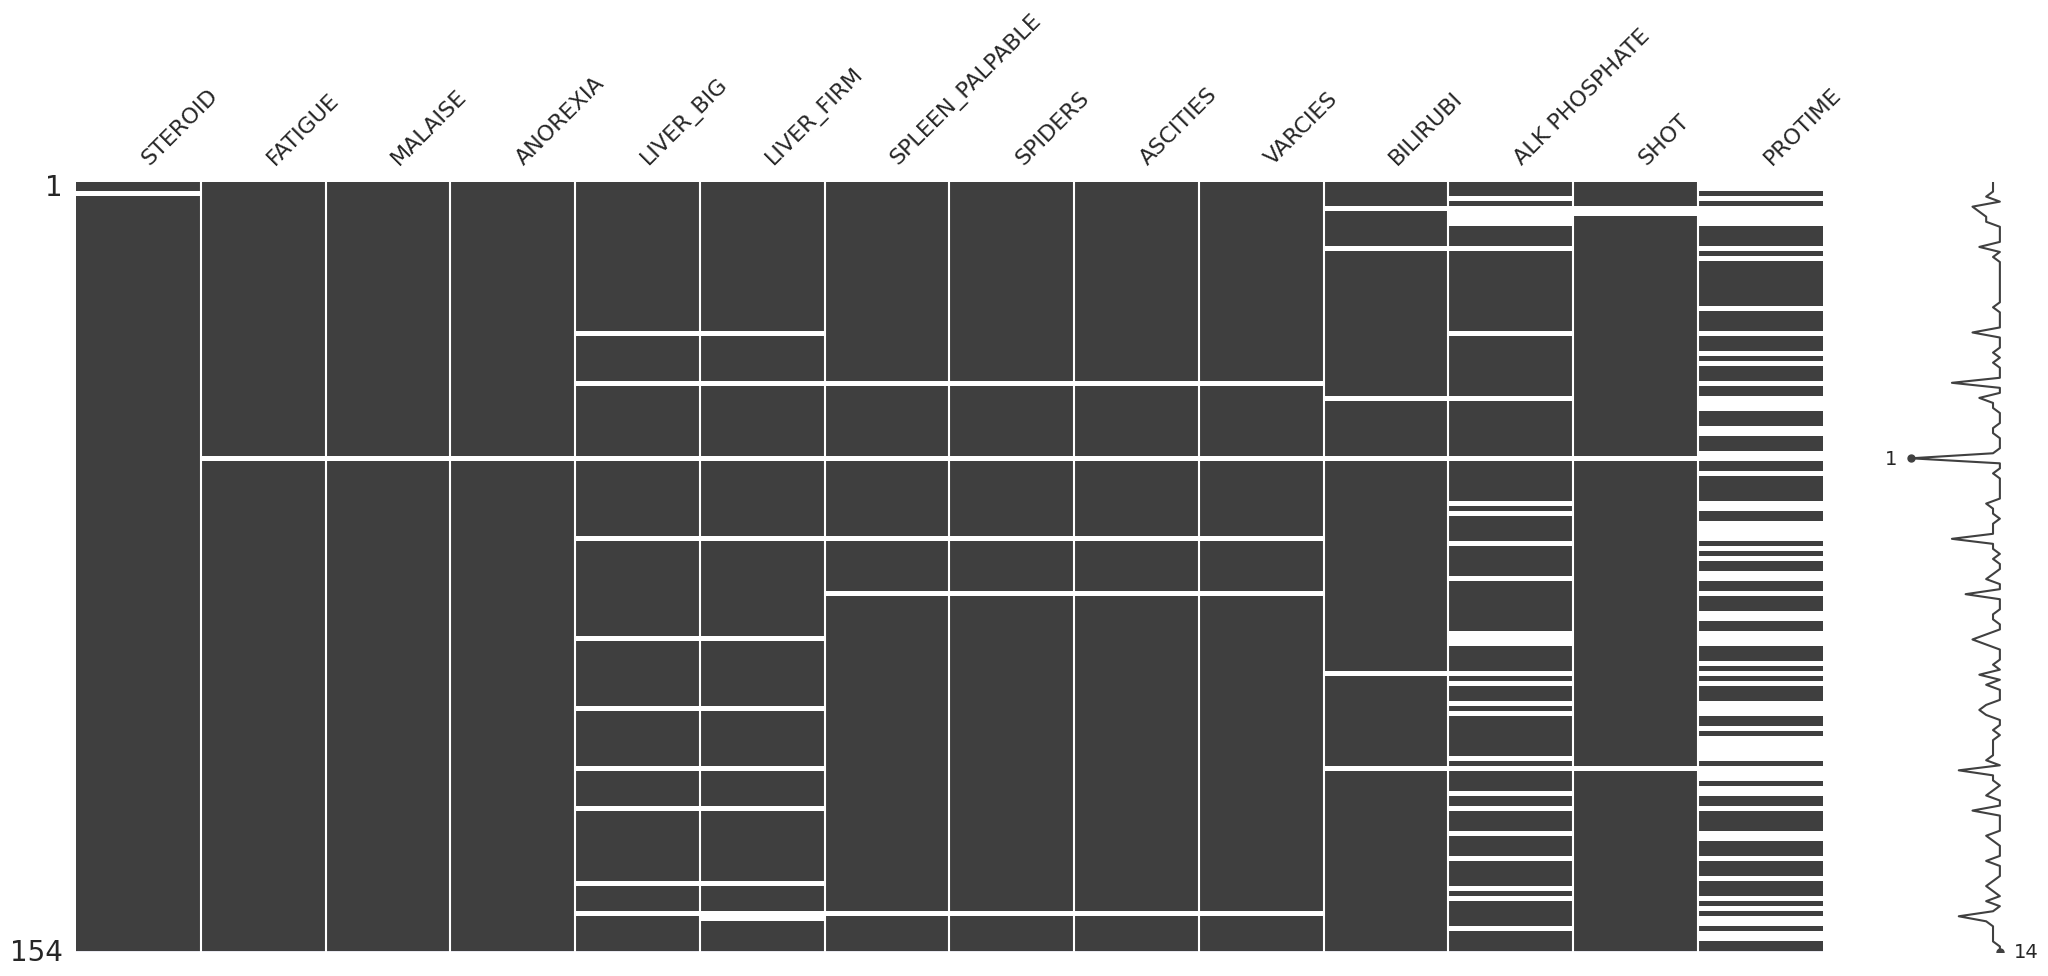

In [41]:
import missingno
missingdata_df = UAS.columns[UAS.isnull().any()].tolist()
missingno.matrix(UAS[missingdata_df])

In [42]:
UAS.isnull().sum()

CLASS               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITIES            5
VARCIES             5
BILIRUBI            6
ALK PHOSPHATE      29
SHOT                4
ALBUMIN             0
PROTIME            66
HISTOLOGI           0
dtype: int64

In [43]:
UAS.isnull().sum()

CLASS               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITIES            5
VARCIES             5
BILIRUBI            6
ALK PHOSPHATE      29
SHOT                4
ALBUMIN             0
PROTIME            66
HISTOLOGI           0
dtype: int64

In [44]:
categorical_col = []
for column in UAS.columns:
    UAS[column] = np.asarray(UAS[column],dtype=float)
    UAS[column]= np.asarray(UAS[column], dtype=float)

In [46]:
UAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CLASS            154 non-null    float64
 1   AGE              154 non-null    float64
 2   SEX              154 non-null    float64
 3   STEROID          153 non-null    float64
 4   ANTIVIRALS       154 non-null    float64
 5   FATIGUE          153 non-null    float64
 6   MALAISE          153 non-null    float64
 7   ANOREXIA         153 non-null    float64
 8   LIVER_BIG        144 non-null    float64
 9   LIVER_FIRM       143 non-null    float64
 10  SPLEEN_PALPABLE  149 non-null    float64
 11  SPIDERS          149 non-null    float64
 12  ASCITIES         149 non-null    float64
 13  VARCIES          149 non-null    float64
 14  BILIRUBI         148 non-null    float64
 15  ALK PHOSPHATE    125 non-null    float64
 16  SHOT             150 non-null    float64
 17  ALBUMIN         

In [50]:
median_value=UAS['STEROID'].median()
UAS['STEROID']=UAS['STEROID'].fillna(median_value)

median_value=UAS['FATIGUE'].median()
UAS['FATIGUE']=UAS['FATIGUE'].fillna(median_value)

median_value=UAS['MALAISE'].median()
UAS['MALAISE']=UAS['MALAISE'].fillna(median_value)

median_value=UAS['ANOREXIA'].median()
UAS['ANOREXIA']=UAS['ANOREXIA'].fillna(median_value)

median_value=UAS['LIVER_BIG'].median()
UAS['LIVER_BIG']=UAS['LIVER_BIG'].fillna(median_value)

median_value=UAS['LIVER_FIRM'].median()
UAS['LIVER_FIRM']=UAS['LIVER_FIRM'].fillna(median_value)

median_value=UAS['SPLEEN_PALPABLE'].median()
UAS['SPLEEN_PALPABLE']=UAS['SPLEEN_PALPABLE'].fillna(median_value)

median_value=UAS['SPIDERS'].median()
UAS['SPIDERS']=UAS['SPIDERS'].fillna(median_value)

median_value=UAS['ASCITIES'].median()
UAS['ASCITIES']=UAS['ASCITIES'].fillna(median_value)

median_value=UAS['VARCIES'].median()
UAS['VARCIES']=UAS['VARCIES'].fillna(median_value)

median_value=UAS['BILIRUBI'].median()
UAS['BILIRUBI']=UAS['BILIRUBI'].fillna(median_value)

median_value=UAS['ALK PHOSPHATE'].median()
UAS['ALK PHOSPHATE']=UAS['ALK PHOSPHATE'].fillna(median_value)

median_value=UAS['SHOT'].median()
UAS['SHOT']=UAS['SHOT'].fillna(median_value)

median_value=UAS['ALBUMIN'].median()
UAS['ALBUMIN']=UAS['ALBUMIN'].fillna(median_value)

median_value=UAS['PROTIME'].median()
UAS['PROTIME']=UAS['PROTIME'].fillna(median_value)

In [51]:
UAS.isnull().values.any()

False

In [52]:
UAS

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITIES,VARCIES,BILIRUBI,ALK PHOSPHATE,SHOT,ALBUMIN,PROTIME,HISTOLOGI
0,1.0,50.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,11.0,61.0,0.0
1,1.0,78.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,16.0,61.0,0.0
2,1.0,31.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,16.0,80.0,0.0
3,1.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,16.0,61.0,0.0
4,1.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,16.0,75.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.0,46.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,85.0,242.0,9.0,50.0,1.0
150,1.0,44.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,19.0,61.0,1.0
151,1.0,61.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,17.0,61.0,1.0
152,1.0,53.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,17.0,48.0,1.0


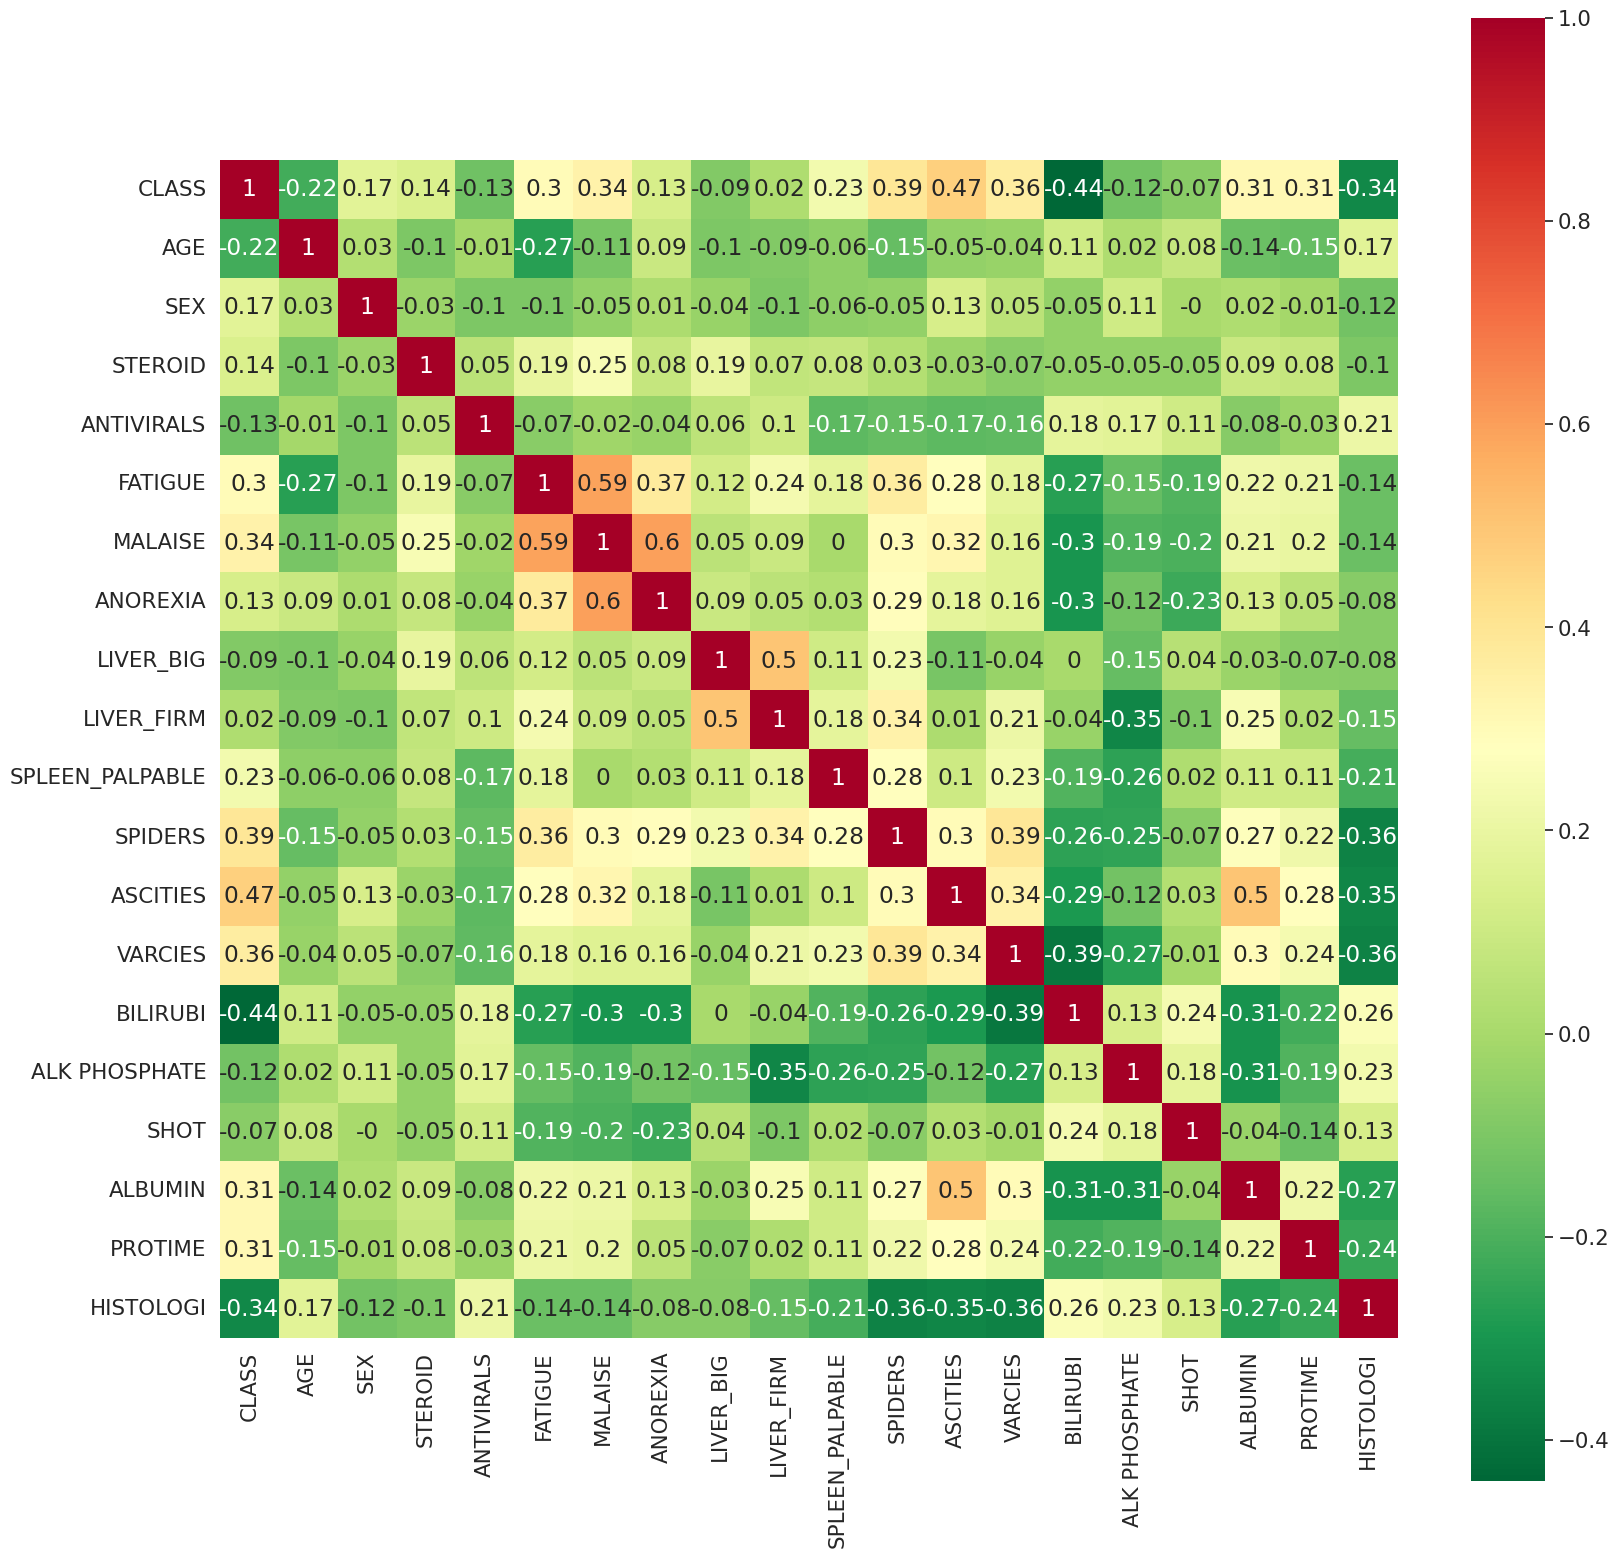

In [53]:
# Correlation Heatmap
correlation = UAS.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

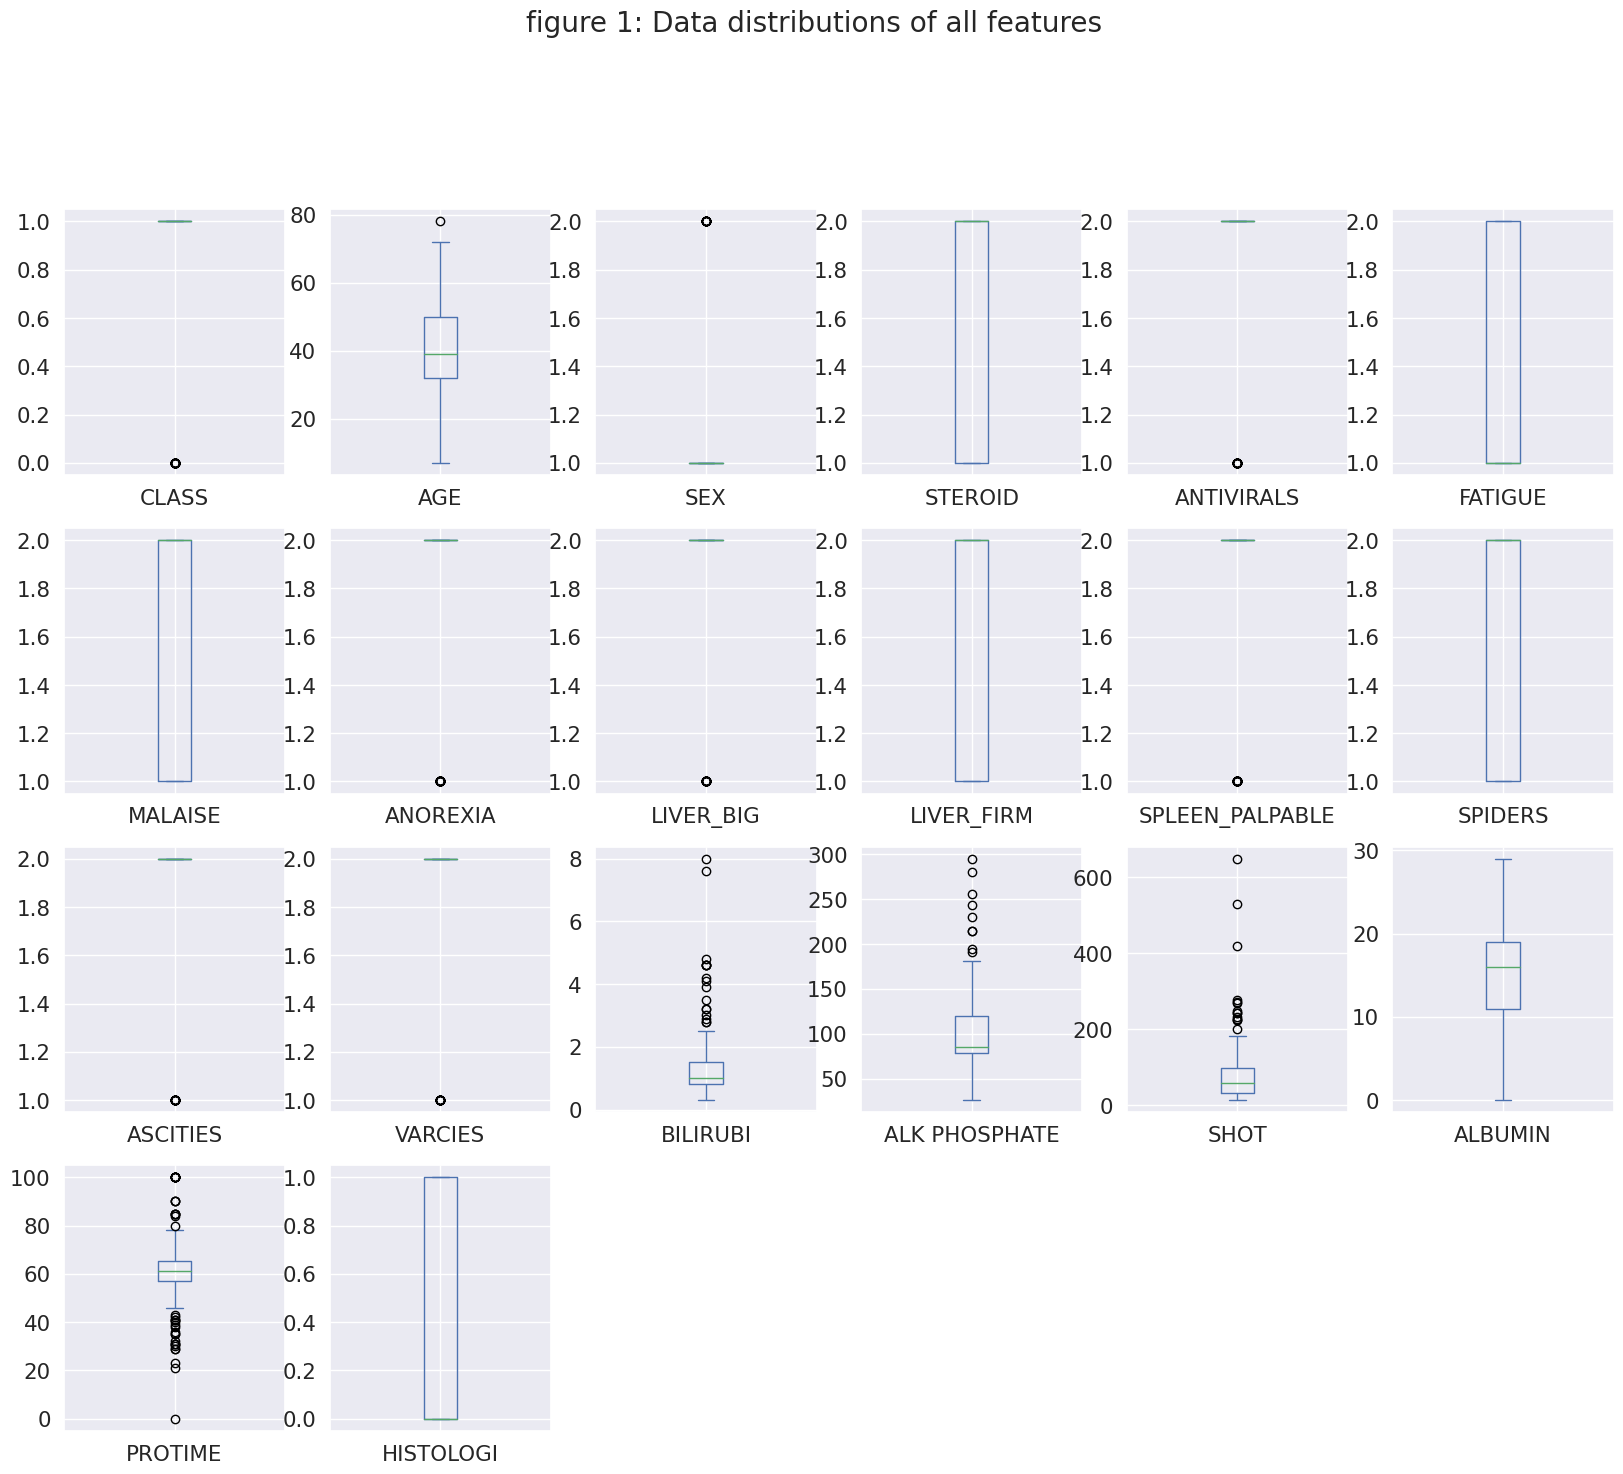

In [54]:
UAS.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

In [55]:
x = UAS.drop("CLASS", axis=1)
y = UAS["CLASS"]

In [57]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)


In [59]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [61]:
y_pred=model.predict(x_test)
y_pred


array([1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])

In [62]:
acc = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {acc:.2f}")

Model accuracy: 0.81


In [63]:
x_baru = np.array([[22.,2.,1.,2.,1.,2.,1.,2.,1.,1.,1.,1.,1.,2.3,40.,100.,6.,40.,1.]])

In [64]:
y_pred=model.predict(x_baru)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1.])